# Chanpter 2-2, 데이터 전처리
데이터 전처리, 표준점수, 브로드캐스팅

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
# 넘파이 np.column_stack로 데이터 한쌍씩 쌓기
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack([fish_length, fish_weight])

In [6]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [8]:
# np.ones()와 np.zeros() 사용하여 배열 만들고 라벨링하기
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [11]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [14]:
# train_test_split의 기본 값은 25%
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [15]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


원본 데이터를 봤을 때 총 49개중   
도미가 35개 빙어가 14개로 2.5:1 비율이였다.   
하지만 위에서 `train_test_split()`으로   
섞은 비율을 보면 3.3:1 비율이다.   
일부 클래스의 비율이 적을 때 이런 식으로 나올 수 있다.   
그래서 `train_test_split()`에 `stratify` 매개변수로   
target 데이터를 전달하면 비율에 맞게 데이터를 나눈다.

In [16]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [17]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


### 이상한 데이터 한개

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [21]:
print(kn.predict([[25,150]]))

[0.]


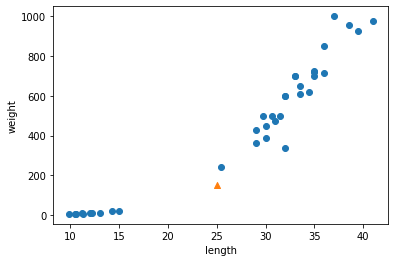

In [25]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

주황색 세모 데이터는 우측 상단에 있는   
1로 라벨링된 데이터들과 같다고 예측했다.   
하지만 좌측 하단에 있는 0으로 라벨링된   
데이터들과 라벨링 값이 같다고 나온다.   

In [30]:
# 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() method 사용
distances, indexes = kn.kneighbors([[25, 150]])

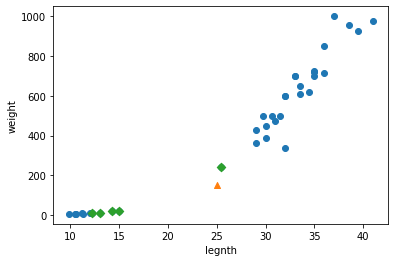

In [51]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('legnth')
plt.ylabel('weight')
plt.show()

In [33]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [34]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [37]:
print(distances)

# 결과값을 보면 세모에 우측 상단에 있는 마름모와의 거리는 92
# 나머지는 130... 표에서 보이는 것 보다 비율이 이상하다.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 기준 맞추기
위에 비율이 이상한 이유는 x축과 y축의 범위가 달라서 그랬다.

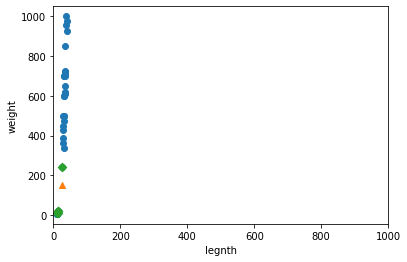

In [52]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('legnth')
plt.ylabel('weight')
plt.show()

비율을 같게 했더니 길이보다 무게만 크게 영향을 미치고 있다.   
두 특성의 값이 다르다 = 두 특성의 스케일이 다르다고 말한다.   
데이터를 표현하는 기준이 다르면 알고리즘도 예측하기 힘들다.   
그래서 데이터 전처리(Data processing)를 해줘야 한다.   

### 표준점수

널리 사용되는 표준점수로 데이터 전처리 하기   
평균을 빼고 표준편차로 나누어 사용한다.

In [40]:
mean = np.mean(train_input, axis=0) # 평균
std = np.std(train_input, axis=0) # 표준편차

In [41]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [42]:
train_scaled = (train_input - mean) / std

In [43]:
print(train_scaled[:,0], train_scaled[:,1])

[ 0.24070039 -1.51237757  0.5712808  -1.60253587  1.22242404  0.17057727
  0.87180845  0.87180845  0.37092904  0.77163257  0.97198434 -1.61255346
  0.72154463 -1.53241275  0.17057727  0.5712808   0.34087627  1.12224816
  0.62136874 -1.30200822  0.42101698 -0.19005591 -1.75279969  0.47110492
 -1.68267658  0.62136874 -1.67265899  0.77163257  0.47110492  0.77163257
 -1.43223687  0.27075315  0.47110492 -1.2318851   0.27075315  1.37268787] [ 0.14198246 -1.36683783  0.76060496 -1.37766373  1.45655528 -0.07453542
  0.80390854  1.22457184  0.06465464  0.82246721  1.68853872 -1.3742613
  0.51315596 -1.3742613  -0.28177396  0.76060496  0.14198246  1.54934866
  0.60594934 -1.34363949  0.14198246 -0.65604058 -1.38384995  0.45129371
 -1.38137546  0.48222484 -1.38292202  0.76060496  0.45129371  0.83793278
 -1.36683783 -0.01267317 -0.35291555 -1.34302087 -0.19825992  1.61121091]


### 전처리 데이터로 모델 트레이닝

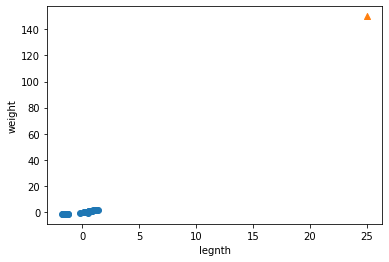

In [53]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('legnth')
plt.ylabel('weight')
plt.show()

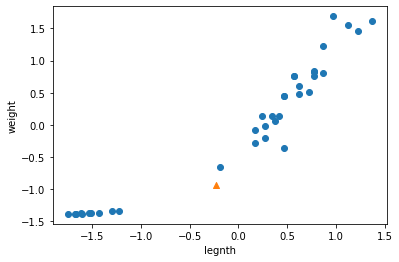

In [54]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('legnth')
plt.ylabel('weight')
plt.show()

In [46]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [47]:
test_scaled = (test_input - mean) / std

In [49]:
kn.score(test_scaled, test_target)

1.0

In [50]:
print(kn.predict([new]))

[1.]


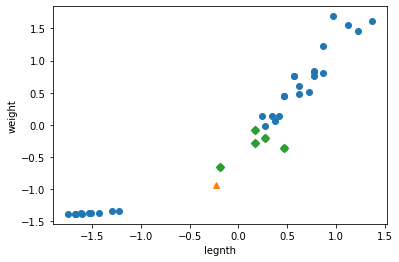

In [56]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('legnth')
plt.ylabel('weight')
plt.show()